I have taken some references Vivek Srinivasan EDA & Ensemble Model (Top 10 Percentile) to build this kernel

In [460]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import os
import time
import warnings
import os
from six.moves import urllib
import matplotlib
from datetime import datetime
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [461]:
#Add All the Models Libraries

# Scalers
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

# Models
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from scipy.stats import reciprocal, uniform

from sklearn.ensemble import AdaBoostClassifier


# Cross-validation
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.model_selection import cross_validate

# GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Common data processors
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from scipy import sparse

#Accuracy Score
from sklearn.metrics import accuracy_score

In [462]:
# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [463]:
#merge the data for feature engineering and later split it, just before applying Data Pipeline
TrainFile = pd.read_csv("U:\\Bike Sharing\\train.csv") #read the data from the csv file.
TestFile = pd.read_csv("U:\\Bike Sharing\\test.csv")

In [464]:
TrainFile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [465]:
TestFile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.6+ KB


In [466]:
TrainFile.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [467]:
TestFile.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


In [468]:
TrainFile.shape

(10886, 12)

In [469]:
TestFile.shape

(6493, 9)

In [470]:
TrainFile.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [471]:
TestFile.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


Create New Columns from DataTime Column

In [472]:
DataFile = TrainFile.append(TestFile,sort=False)
DataFile.reset_index(inplace=True)
DataFile.drop('index',inplace=True,axis=1)

In [473]:
DataFile.shape

(17379, 12)

In [474]:
DataFile['date'] = DataFile.datetime.apply(lambda x: x.split()[0])
DataFile['hour'] = DataFile.datetime.apply(lambda x: x.split()[1].split(":")[0]).astype("int")
DataFile['year']  = DataFile.datetime.apply(lambda x: x.split()[0].split("-")[0])
DataFile['month'] = DataFile.date.apply(lambda x: datetime.strptime(x,"%Y-%m-%d").month)
DataFile['weekday'] = DataFile.date.apply(lambda x: datetime.strptime(x,"%Y-%m-%d").weekday())
DataFile = DataFile.drop(["datetime", "date"],axis=1)

Convert Season and Weather into Categorical Values

In [475]:
DataFile["season"] = DataFile.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })

In [476]:
DataFile["weather"] = DataFile.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })

In [477]:
categoryVariableList = ["hour","weekday","month","season","weather","holiday","workingday","year"]
for var in categoryVariableList:
    DataFile[var] = DataFile[var].astype("category")

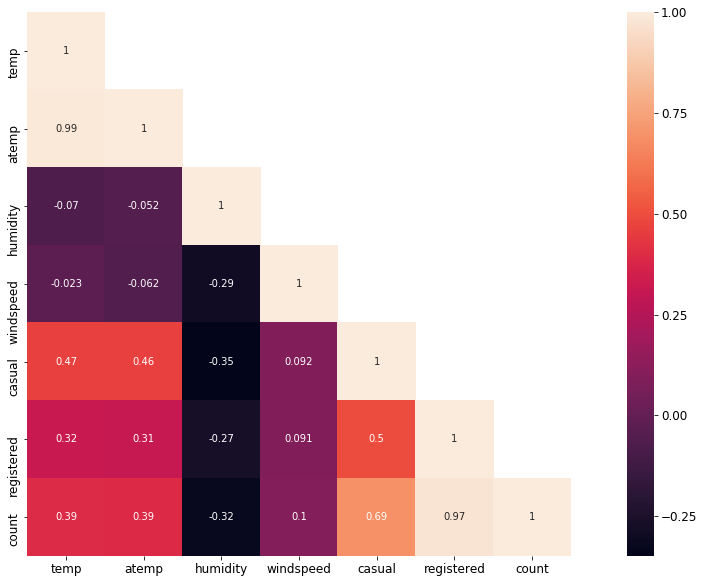

In [478]:
import seaborn as sn

correlation_matrix = DataFile[:].corr()
mask = np.array(correlation_matrix)
mask[np.tril_indices_from(mask)] = False
figure = plt.gcf()
figure.set_size_inches(20,10)
sn.heatmap(data=correlation_matrix, mask=mask, square=True, annot=True, cbar=True);

In [479]:
#DROP the column atemp because of correlation.
DataFile = DataFile.drop(labels='atemp', axis=1)

[Text(0,0.5,'Count'),
 Text(0.5,0,'workingday'),
 Text(0.5,1,'Box Plot On Count Across Working Day')]

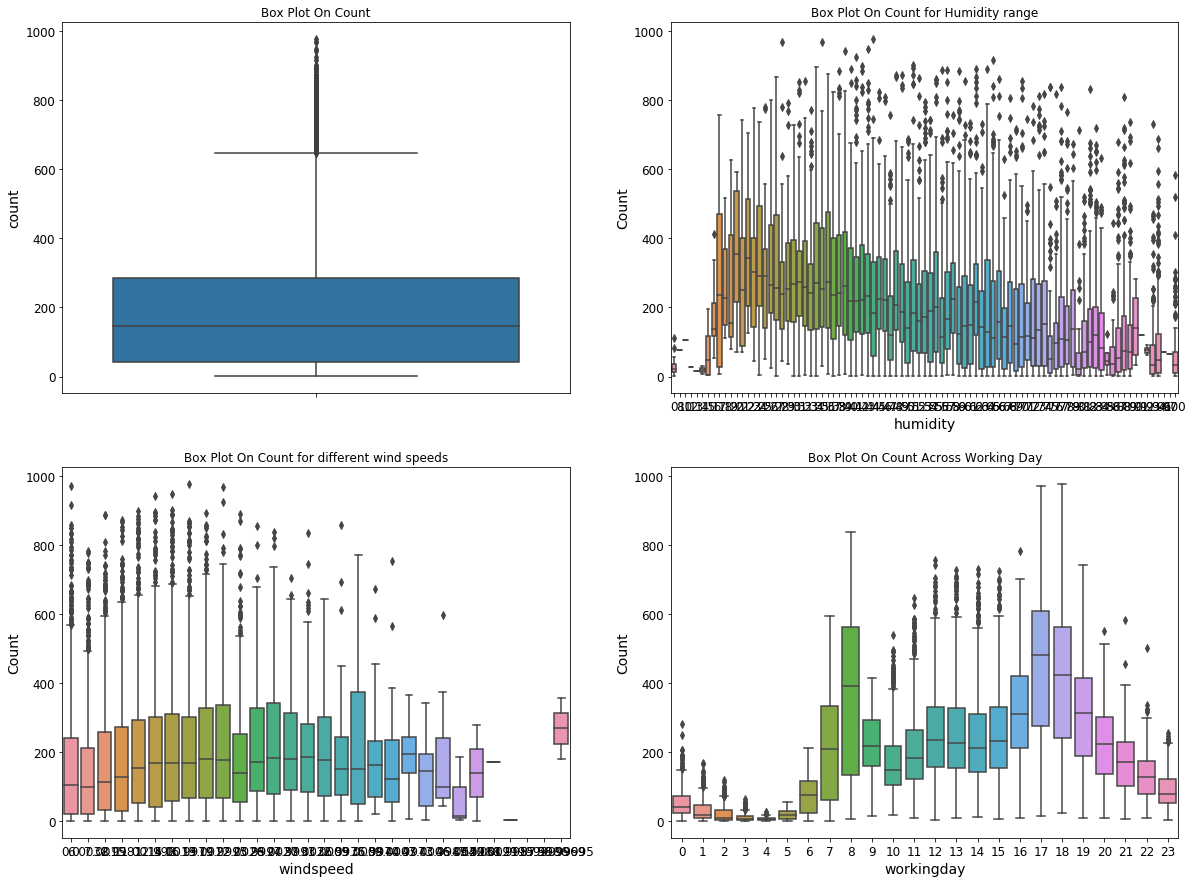

In [480]:
## Exploratory Outlier Analysis - Idea from https://www.kaggle.com/viveksrinivasan/eda-ensemble-model-top-10-percentile
fig,axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20,15)
sn.boxplot(data = DataFile, x='hour', y='count', orient = 'v', ax = axes[1][1])
sn.boxplot(data = DataFile, x='humidity', y='count', orient = 'v', ax = axes[0][1])
sn.boxplot(data = DataFile, x='windspeed',y='count', orient = 'v', ax = axes[1][0])
sn.boxplot(data = DataFile, y='count', orient = 'v', ax = axes[0][0])

axes[0][0].set(ylabel='count',title="Box Plot On Count")
axes[0][1].set(xlabel='humidity', ylabel='Count',title="Box Plot On Count for Humidity range")
axes[1][0].set(xlabel='windspeed', ylabel='Count',title="Box Plot On Count for different wind speeds")
axes[1][1].set(xlabel='workingday', ylabel='Count',title="Box Plot On Count Across Working Day")

[Text(0,0.5,'Users Count'),
 Text(0.5,0,'Hour Of The Day'),
 Text(0.5,1,'Average Users Count By Hour Of The Day Across User Type'),
 None]

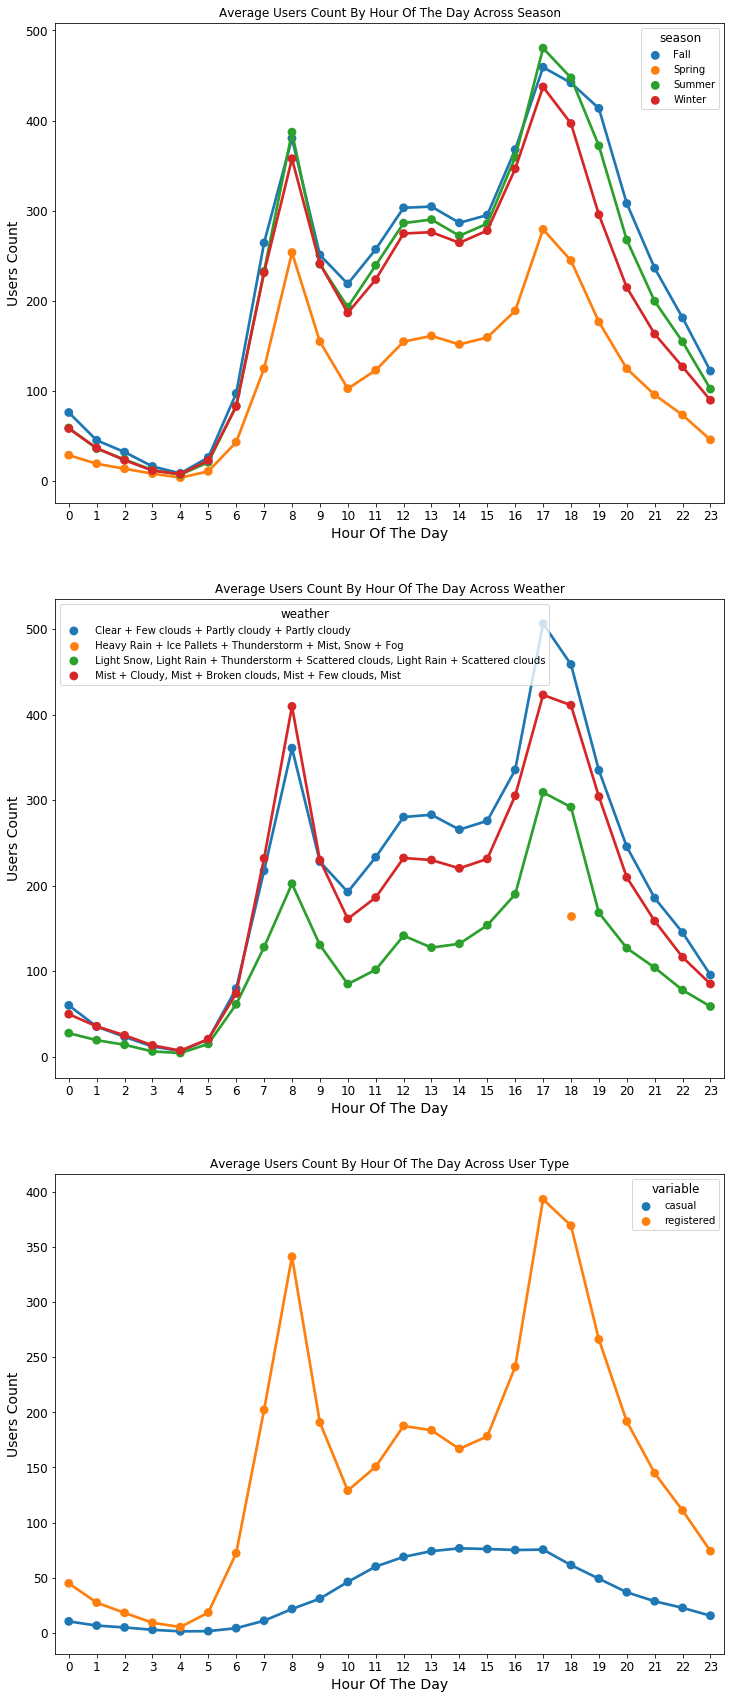

In [481]:
# Visualizations : Check the counts vs Season, Weather, Hour, Weekday - idea taken from https://www.kaggle.com/viveksrinivasan/eda-ensemble-model-top-10-percentile
fig,(ax1,ax2,ax3)= plt.subplots(nrows=3)
fig.set_size_inches(12, 30)
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

hourAggregated = pd.DataFrame(DataFile_new.groupby(["hour","season"],sort=True)["count"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["season"], data=hourAggregated, join=True,ax=ax1)
ax1.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')

hourAggregated = pd.DataFrame(DataFile.groupby(["hour","weather"],sort=True)["count"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["weather"], data=hourAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weather",label='big')

hourTransformed = pd.melt(DataFile[["hour","casual","registered"]], id_vars=['hour'], value_vars=['casual', 'registered'])
hourAggregated = pd.DataFrame(hourTransformed.groupby(["hour","variable"],sort=True)["value"].mean()).reset_index()

sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["value"],hue=hourAggregated["variable"],hue_order=["casual","registered"], data=hourAggregated, join=True,ax=ax3)
ax3.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across User Type",label='big')

In [488]:
DataFile = DataFile.drop(['casual','registered'],axis=1)

In [501]:
# Removing the potential outliers from the training set and maintain the test set

test_set = DataFile[~pd.notnull(DataFile['count'])]
train_set = DataFile[np.abs(DataFile["count"]-DataFile["count"].mean())<=(3*DataFile["count"].std())] 
test_set = test_set.drop('count',axis = 1)

In [502]:
test_set.shape

(6493, 11)

In [503]:
train_set.shape

(10739, 12)

In [504]:
#Check for the missing values to check if any random extraction happened? Validate that shuffle was false

obs = train_set.isnull().sum().sort_values(ascending = False)
percent = round(train_set.isnull().sum().sort_values(ascending = False)/len(train_set)*100, 2)
pd.concat([obs, percent], axis = 1,keys= ['Number of Observations', 'Percent'])

,Number of Observations,Percent
weekday,0,0.0
month,0,0.0
year,0,0.0
hour,0,0.0
count,0,0.0
windspeed,0,0.0
humidity,0,0.0
temp,0,0.0
weather,0,0.0
workingday,0,0.0


In [505]:
#Check for the missing values in test data
obs = test_set.isnull().sum().sort_values(ascending = False)
percent = round(test_set.isnull().sum().sort_values(ascending = False)/len(test_set)*100, 2)
pd.concat([obs, percent], axis = 1,keys= ['Number of Observations', 'Percent'])

,Number of Observations,Percent
weekday,0,0.0
month,0,0.0
year,0,0.0
hour,0,0.0
windspeed,0,0.0
humidity,0,0.0
temp,0,0.0
weather,0,0.0
workingday,0,0.0
holiday,0,0.0
